# <center>★ Pokemon battles - predict who's the best! ★</center>
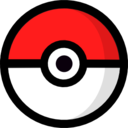

<b>Pokémon</b> - (an abbreviation for Pocket Monsters in Japan) is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1995, and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport. All media works within the franchise are set in the Pokémon universe. The English slogan for the franchise is "Gotta Catch ‘Em All!". There are currently 898 Pokémon species.

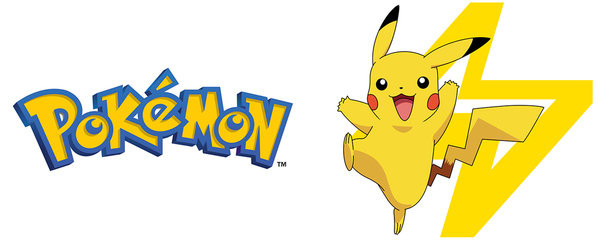

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets

In [2]:
df_combats = pd.read_csv("/home/norbert/Pulpit/Datasets/Pokemon/combats.csv")
df_pokemon = pd.read_csv("/home/norbert/Pulpit/Datasets/Pokemon/pokemon.csv")
df_tests = pd.read_csv("/home/norbert/Pulpit/Datasets/Pokemon/tests.csv")

In [3]:
df_combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
df_tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


## Pokemon dataset - exploratory (shape, info, describe etc.)

In [6]:
print(f"Pokemon dataset has {df_pokemon.shape[0]} rows and {df_pokemon.shape[1]} columns.")

Pokemon dataset has 800 rows and 12 columns.


In [7]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
df_pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,400.50000,231.084400,1.0,200.75,400.5,600.25,800.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [9]:
pd.DataFrame(df_pokemon.isnull().sum()).rename(columns={0:"Sum"})

,Sum
#,0
Name,1
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


<b>Conclusion</b>
- We have some nulls in Type2 column, but that's fine, becouse not every pokemon has Type2.
- According to describe function - we have balanced dataset looking at mean and median

## Preparing pokemon dataset (adding new column etc.)

In [10]:
df_pokemon['Total. Stats'] = df_pokemon['HP'] + df_pokemon['Attack'] + df_pokemon['Defense'] + df_pokemon['Sp. Atk'] + df_pokemon['Sp. Def'] + df_pokemon['Speed'] 

## Data visualisation

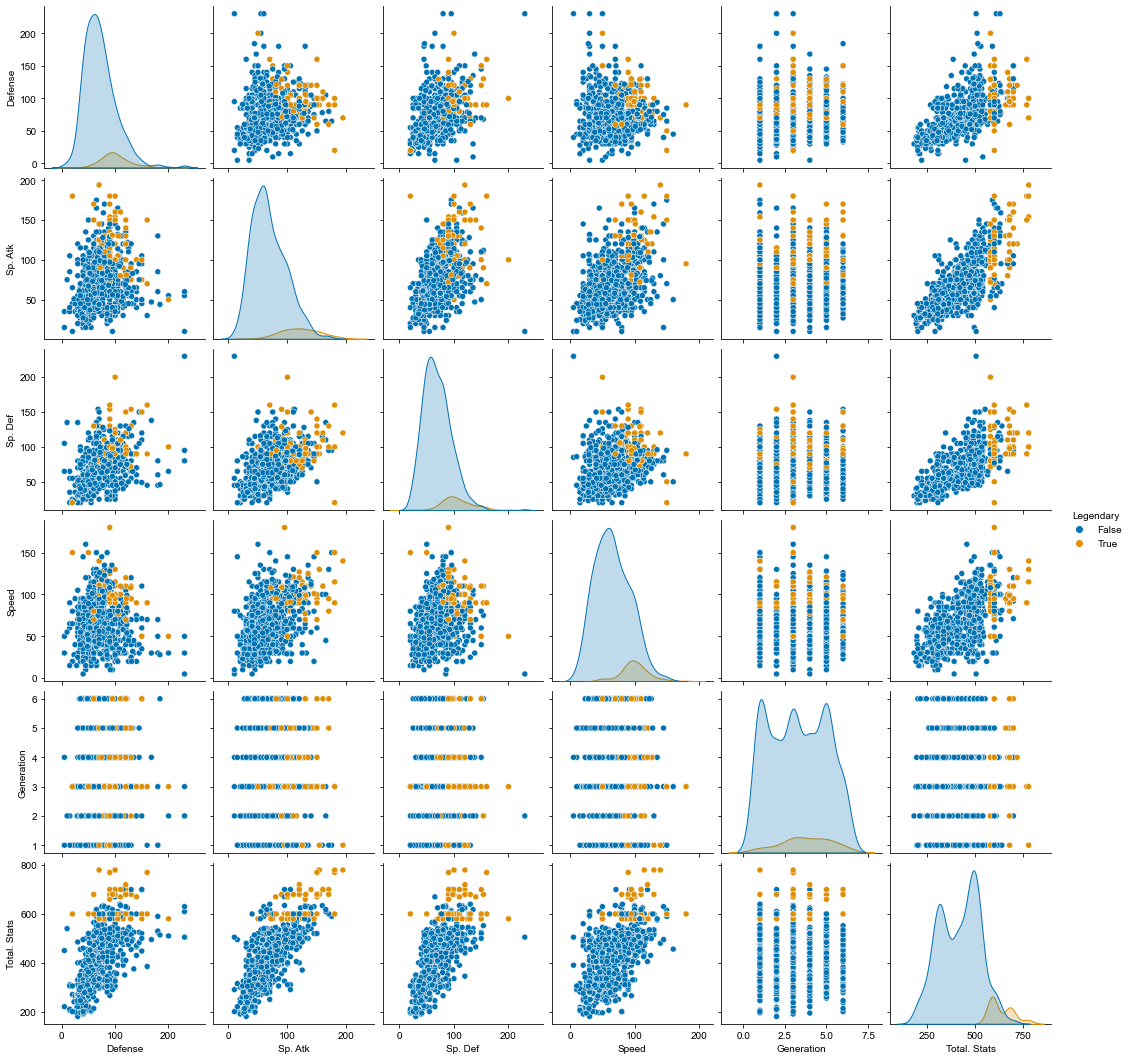

In [11]:
sns.pairplot(df_pokemon.drop(columns=['#', 'Name', "HP", "Attack"], axis=1), hue='Legendary', palette='colorblind')
sns.set(font_scale = 1.2)
plt.show()

In [12]:
df_mean = df_pokemon.groupby(by=['Generation']).mean()
df_max = pd.DataFrame(df_pokemon.groupby(by=['Generation'])['Total. Stats'].max())

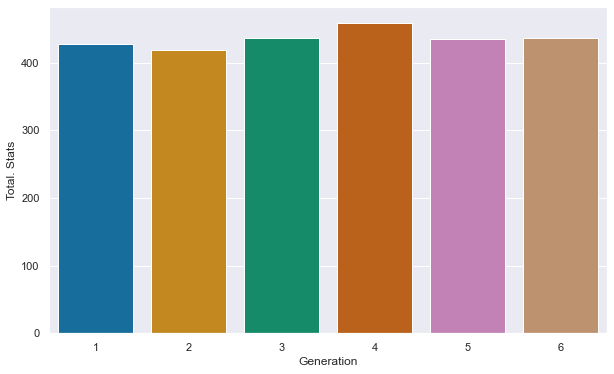

In [13]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x=df_mean.index, y=df_mean['Total. Stats'], data= df_mean, palette='colorblind')
plt.show()

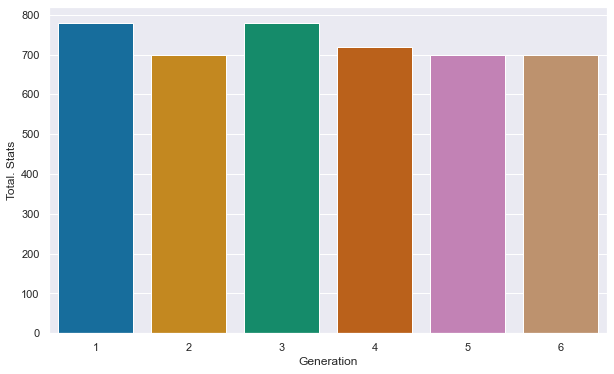

In [14]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x=df_max.index, y=df_max['Total. Stats'], data = df_max, palette='colorblind')
plt.show()

In [15]:
df_max_type_1 = df_pokemon.groupby(by='Type 1').mean().sort_values(by='Total. Stats', ascending=False)

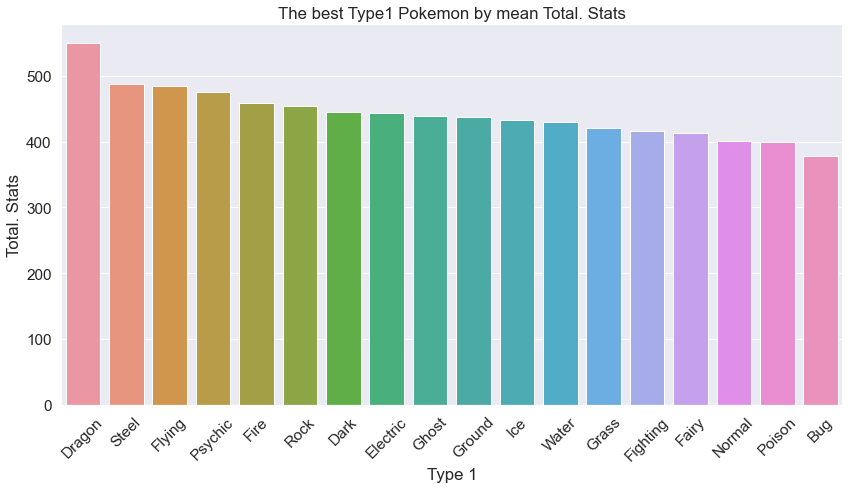

In [16]:
sns.set(rc={'figure.figsize':(14,7)})
sns.set(font_scale=1.4)
sns.barplot(x=df_max_type_1.index, y=df_max_type_1['Total. Stats'], data=df_max_type_1)
plt.xticks(rotation=45)
plt.title('The best Type1 Pokemon by mean Total. Stats')
plt.show()

<b>Conclusion</b>

TOP3 Pokemon by Type1:
- Dragon
- Steel
- Flying

TOP1 Pokomon by Generation:
- 4

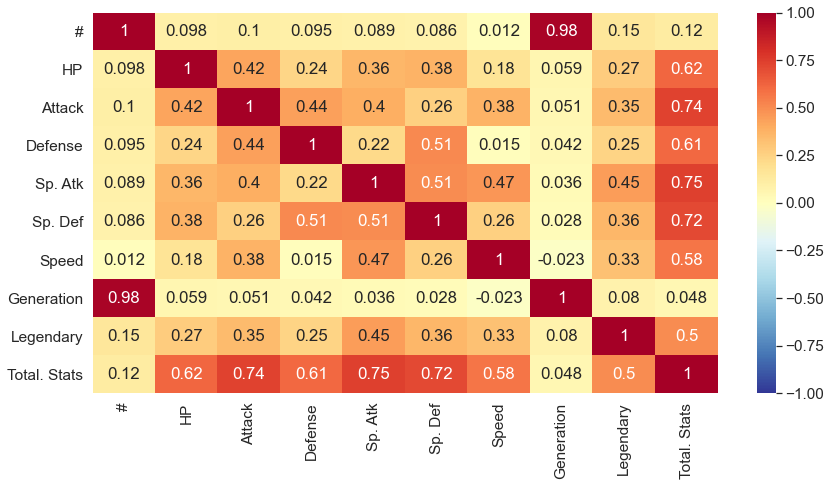

In [17]:
corr = df_pokemon.corr()
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlBu_r')
plt.show()

In [18]:
#TOP 10 strongest pokemon
df_pokemon.sort_values(by='Total. Stats', ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total. Stats
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
422,423,Primal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
552,553,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720
712,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700
711,712,Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
413,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700


- <b>TOP1 Legendary - Mega Rayquaza</b>
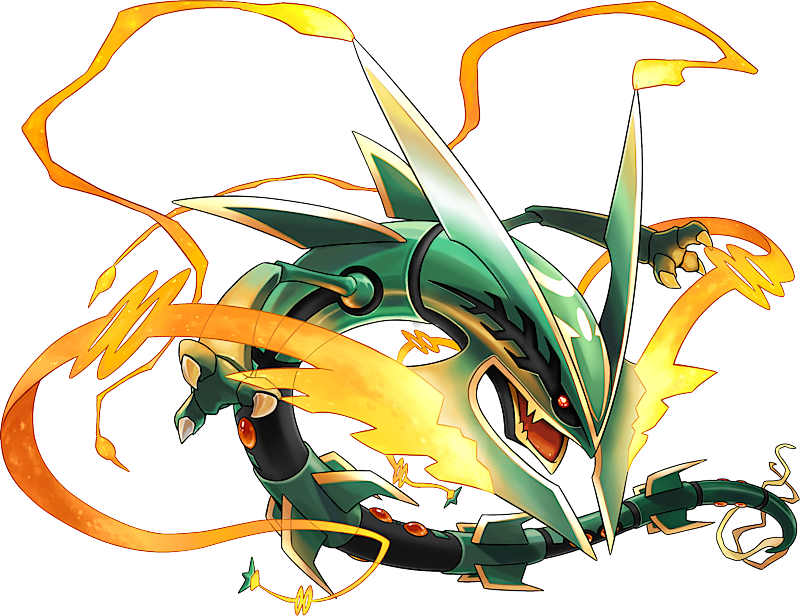

- <b>TOP1 Non-Legendary - Mega Salamence</b>
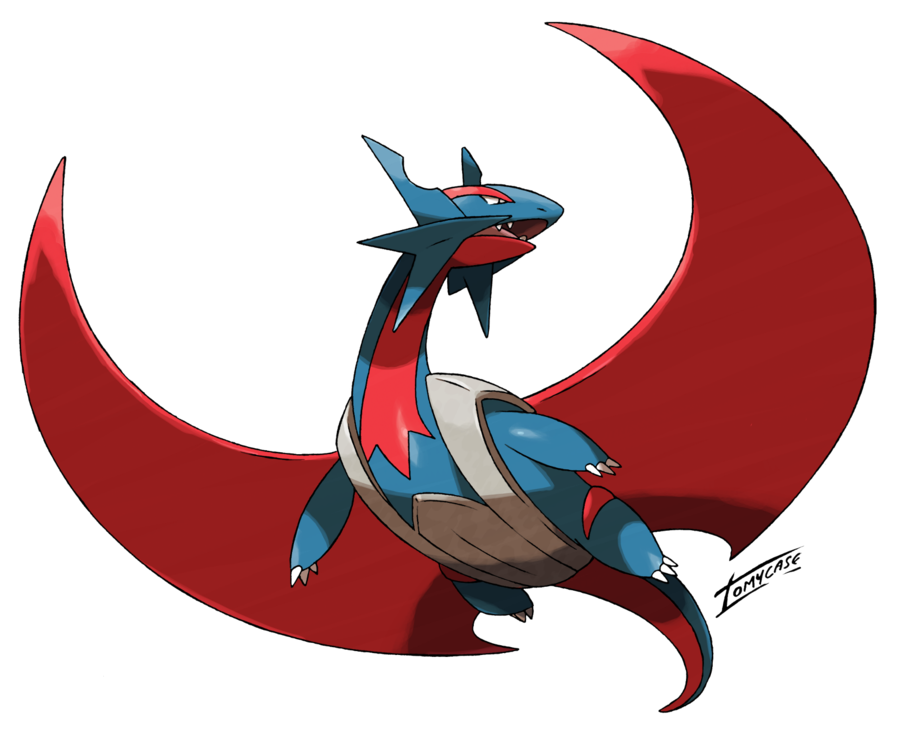

In [19]:
#TOP 10 weakest pokemon
df_pokemon.sort_values(by='Total. Stats', ascending=True).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total. Stats
206,207,Sunkern,Grass,NaN,30,30,30,30,30,30,2,False,180
322,323,Azurill,Normal,Fairy,50,20,40,20,40,20,3,False,190
446,447,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,194
288,289,Wurmple,Bug,NaN,45,45,35,20,30,20,3,False,195
16,17,Weedle,Bug,Poison,40,35,30,20,20,50,1,False,195
13,14,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,195
303,304,Ralts,Psychic,Fairy,28,25,25,45,35,40,3,False,198
732,733,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False,200
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200
381,382,Feebas,Water,NaN,20,15,20,10,55,80,3,False,200


- <b> TOP1 Non-Legendary (weakest) - Sunkern</b>
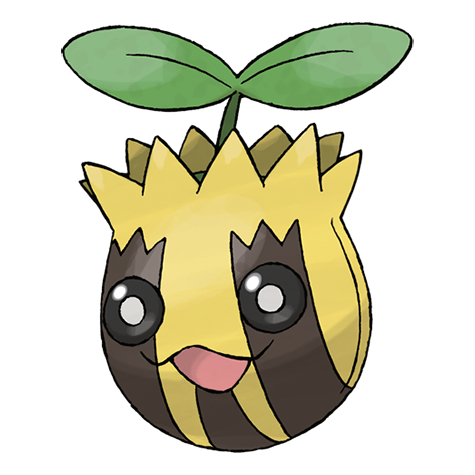

In [20]:
df_pokemon.loc[df_pokemon['Legendary'] == True].sort_values(by='Total. Stats', ascending=True).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total. Stats
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,580
539,540,Azelf,Psychic,NaN,75,125,70,125,70,115,4,True,580
699,700,Cobalion,Steel,Fighting,91,90,129,90,72,108,5,True,580
700,701,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,True,580
701,702,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True,580
702,703,Tornadus Incarnate Forme,Flying,NaN,79,115,70,125,80,111,5,True,580
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,580
704,705,Thundurus Incarnate Forme,Electric,Flying,79,115,70,125,80,111,5,True,580
538,539,Mesprit,Psychic,NaN,80,105,105,105,105,80,4,True,580
416,417,Registeel,Steel,NaN,80,75,150,75,150,50,3,True,580


- <b>TOP1 Legendary (weakest) - Articuno</b>
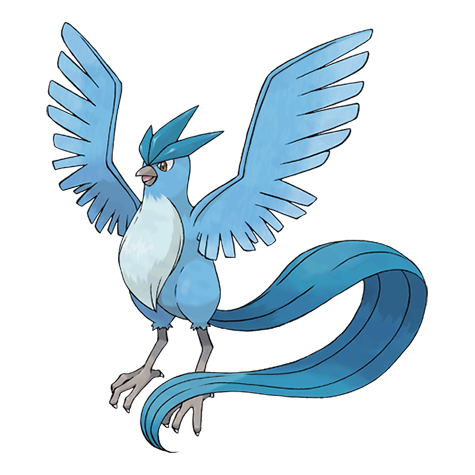

## Building Machine Learging model

In [48]:
df_all = pd.merge(df_pokemon, df_combats, left_on="#", right_on='First_pokemon', how='left')

In [49]:
df_all_2 = pd.merge(df_pokemon, df_combats, left_on="#", right_on='Second_pokemon', how='left')

In [50]:
df_all_3 = pd.concat([df_all, df_all_2])

In [54]:
df_all_4 = df_all_3.drop_duplicates()

In [58]:
df_all_4

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total. Stats,First_pokemon,Second_pokemon,Winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1.0,679.0,679.0
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1.0,687.0,687.0
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1.0,557.0,557.0
3,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1.0,766.0,766.0
4,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1.0,153.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50011,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600,272.0,800.0,272.0
50012,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600,699.0,800.0,800.0
50013,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600,15.0,800.0,800.0
50014,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600,370.0,800.0,800.0


In [57]:
df_all_4.apply(lambda x: 1 if x == df_all_4['First_pokemon'] else 0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().